In [1]:
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm
#from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
#from matplotlib.patches import Ellipse
#from matplotlib.cm import ScalarMappable
#from matplotlib.patheffects import withStroke
#import matplotlib.ticker as ticker

import math
#import csv
#from math import pi
#import pandas as pd
#import glob
#import match 

#import seaborn as sns
#import statistics as stat

#from scipy.stats import kde #for the plot very soft
#from scipy.stats import gaussian_kde
#from sklearn.neighbors import KernelDensity

#from astropy.io import fits
from astropy.table import Table, unique, join, vstack, QTable, hstack
#from astropy.visualization import astropy_mpl_style
#from astropy.visualization import simple_norm
#from astropy.visualization import make_lupton_rgb
#from astropy.visualization import SqrtStretch
#from astropy.visualization import ZScaleInterval

#from astropy.nddata import Cutout2D
from astropy import units as u
from astropy import constants as Cons
from astropy.wcs import WCS
import astropy.cosmology.units as cu
from astropy.cosmology import WMAP9
from astropy.coordinates import SkyCoord, Galactic, Angle


plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 3

In [2]:
t_agn = Table.read('AGN_practico_topicos.dat', format='ascii')

In [3]:
# Kewley+01--------------------------------------
# for NII/Ha
x1 = np.linspace(-2.5, 0.3)
y1 = (0.61/(x1 - 0.47)) +1.19
# for SII/Ha
x2 = np.linspace(-3.0, 0.1)
y2 = (0.72/(x2-0.32))+1.30
# for OI/Ha
x3 = np.linspace(-4,-0.8)
y3 = (0.73/(x3+0.59))+1.33

# Kewley+06 --------------------- 
# for OI/Ha diagrams
x_k1  = np.linspace(-1.1, 0.1)
y_k1 = 1.18*x_k1 + 1.30
# for SII/Ha
x_k2 = np.linspace(-0.325, 0.35)
y_k2 = 1.89 * x_k2 + 0.76

# Schawinski+07
x4 = np.linspace(-0.180, 1.5)
y4 = 1.05*x4 + 0.45

# Kauffman+03------------------------------------
xk = np.linspace(-1.3,-0.1)
yk = 0.61/(xk - 0.05)+1.3

In [6]:
vds1 = Table.read('voids_1.fits', format='fits')  #https://ui.adsabs.harvard.edu/abs/2015ApJ...799...95W/abstract
vds1 = vds1[vds1['sfrmst']!=-99.99]
vds1_e = vds1[vds1['concind']>2.6]
vds1_l = vds1[vds1['concind']<=2.6]

#spec = Table.read('PARENT_SAMPLE_MPA-JHU.fits', format='fits')
vds2 = Table.read('voids_2.fits', format='fits') #https://ui.adsabs.harvard.edu/abs/1999AJ....118.2561G/abstract
vds2_e = vds2[vds2['concind']>2.6]
vds2_l = vds2[vds2['concind']<=2.6]

In [13]:
#X ---- https://ui.adsabs.harvard.edu/abs/2019MNRAS.482.4329P/abstract
#X ---- https://ui.adsabs.harvard.edu/abs/2012AJ....144...16K/abstract

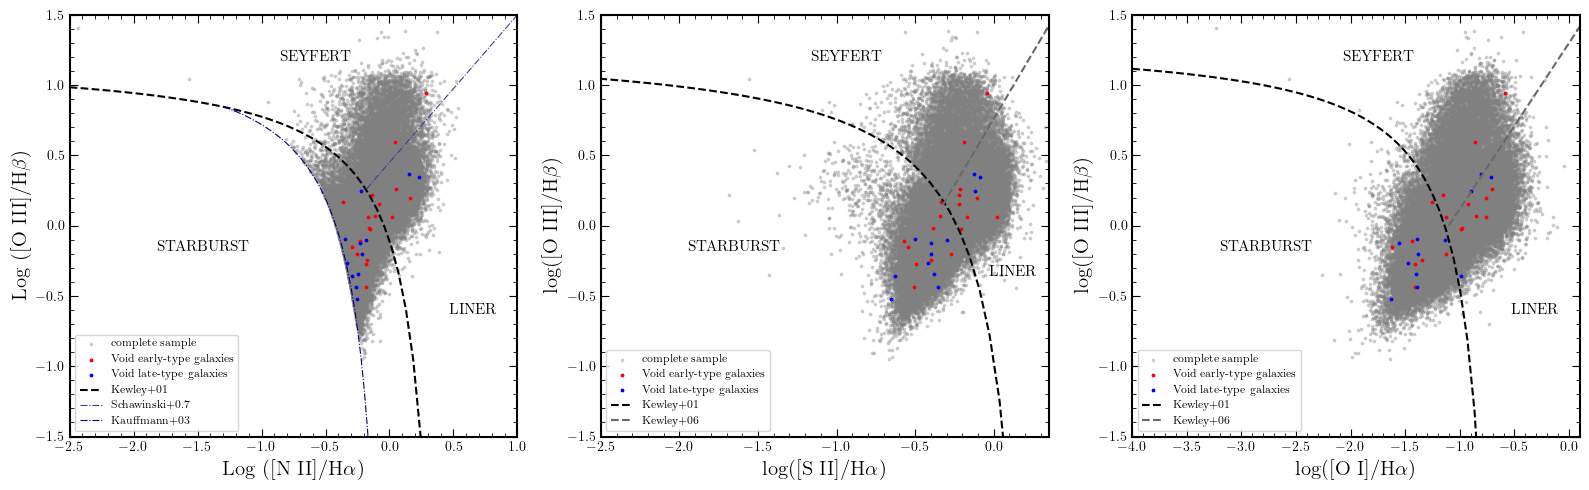

In [68]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5), sharey=False)

ax1.scatter(t_agn['bptx'], t_agn['bpty'], s=3, c='gray', alpha=0.3, label='complete sample')
ax1.scatter(vds2_e['bptx'], vds2_e['bpty'], s=3, c='red', alpha=1, label='Void early-type galaxies')
ax1.scatter(vds2_l['bptx'], vds2_l['bpty'], s=3, c='blue', alpha=1, label='Void late-type galaxies')
ax1.plot(x1,y1, color='black', linestyle='--', label='Kewley+01')
ax1.plot(x4,y4, color='darkslateblue', linestyle='-.', lw=0.8, label='Schawinski+0.7')
ax1.plot(xk,yk, color='navy', linestyle='-.', lw=0.8, label='Kauffmann+03')

ax1.text(0.3, 0.45, 'STARBURST', fontsize=11, ha='center', va='center', transform=ax1.transAxes)
ax1.text(0.55, 0.9, 'SEYFERT', fontsize=11, ha='center', va='center', transform=ax1.transAxes)
ax1.text(0.9, 0.3, 'LINER', fontsize=11, ha='center', va='center', transform=ax1.transAxes)

ax1.set_xlabel(r'$\mathrm{Log\ ([N\ II]/H\alpha)}$', fontsize=15)
ax1.set_ylabel(r'$\mathrm{Log\ ([O\ III]/H\beta)}$', fontsize=15)
ax1.minorticks_on()
ax1.tick_params(axis='x', which='both', top=True)
ax1.tick_params(axis='y', which='both', right=True)
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlim(-2.5, 1)
ax1.legend(loc=3, fontsize=8)

#----------
ax2.scatter(t_agn['bptx2'], t_agn['bpty'], s=3, c='gray', alpha=0.3, label='complete sample')
ax2.scatter(vds2_e['bptx2'], vds2_e['bpty'], s=3, c='red', alpha=1, label='Void early-type galaxies')
ax2.scatter(vds2_l['bptx2'], vds2_l['bpty'], s=3, c='blue', alpha=1, label='Void late-type galaxies')
ax2.plot(x2,y2, color='black', linestyle='--', label='Kewley+01')
ax2.plot(x_k2,y_k2, color='dimgray', linestyle='--', label='Kewley+06')

ax2.text(0.3, 0.45, 'STARBURST', fontsize=11, ha='center', va='center', transform=ax2.transAxes)
ax2.text(0.55, 0.9, 'SEYFERT', fontsize=11, ha='center', va='center', transform=ax2.transAxes)
ax2.text(0.92, 0.39, 'LINER', fontsize=11, ha='center', va='center', transform=ax2.transAxes)

ax2.minorticks_on()
ax2.tick_params(axis='x', which='both', top=True)
ax2.tick_params(axis='y', which='both', right=True)
ax2.set_xlim(-2.5,0.35)
ax2.set_ylim(-1.5, 1.5)
ax2.set_xlabel(r'$\mathrm{log([S\ II]/H\alpha)}$', fontsize=15)
ax2.set_ylabel(r'$\mathrm{log([O\ III]/H\beta)}$', fontsize=15)
ax2.legend(loc=3, fontsize=8)

#-----------
ax3.scatter(t_agn['bptx3'], t_agn['bpty'], s=3, c='gray', alpha=0.3, label='complete sample')
ax3.scatter(vds2_e['bptx3'], vds2_e['bpty'], s=3, c='red', alpha=1, label='Void early-type galaxies')
ax3.scatter(vds2_l['bptx3'], vds2_l['bpty'], s=3, c='blue', alpha=1, label='Void late-type galaxies')
ax3.plot(x3,y3, color='black', linestyle='--', label='Kewley+01')
ax3.plot(x_k1,y_k1, color='dimgray', linestyle='--', label='Kewley+06')

ax3.text(0.3, 0.45, 'STARBURST', fontsize=11, ha='center', va='center', transform=ax3.transAxes)
ax3.text(0.55, 0.9, 'SEYFERT', fontsize=11, ha='center', va='center', transform=ax3.transAxes)
ax3.text(0.9, 0.3, 'LINER', fontsize=11, ha='center', va='center', transform=ax3.transAxes)

ax3.minorticks_on()
ax3.tick_params(axis='x', which='both', top=True)
ax3.tick_params(axis='y', which='both', right=True)
ax3.set_xlim(-4,0.1)
ax3.set_ylim(-1.5, 1.5)
ax3.set_xlabel(r'$\mathrm{log([O\ I]/H\alpha)}$', fontsize=15)
ax3.set_ylabel(r'$\mathrm{log([O\ III]/H\beta)}$', fontsize=15)
ax3.legend(loc=3, fontsize=8)

plt.tight_layout()

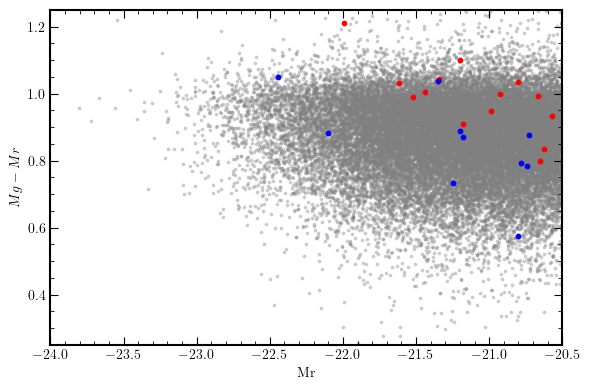

In [84]:
fig, (ax1) = plt.subplots(1,1, figsize=(6,4), sharex=True)

# INNER
#ax1.scatter(vds1['Mr'], vds1['Mg'] - vds1['Mr'], s=3, c='gray', alpha=0.3)
ax1.scatter(t_agn['Mr'], t_agn['Mg']-t_agn['Mr'], s=3, c='gray', alpha=0.3, label='complete sample')
ax1.scatter(vds2_e['Mr'], vds2_e['Mg']-vds2_e['Mr'], s=10, c='red', label=r'Voids $C > 2.6$')
ax1.scatter(vds2_l['Mr'], vds2_l['Mg']-vds2_l['Mr'], s=10, c='blue', label=r'Voids $C \leq 2.6$')

ax1.set_ylabel(r'$Mg - Mr$')
ax1.set_xlabel(r'Mr')
ax1.minorticks_on()
ax1.tick_params(axis='x', which='both', top=True)
ax1.tick_params(axis='y', which='both', right=True)
ax1.set_xlim(-24,-20.5)
ax1.set_ylim(0.25,1.25)

plt.tight_layout()

In [86]:
np.median(vds2_e['Mr'])

-20.864739999999998

Text(0.5, 0, '$Mg-Mr$')

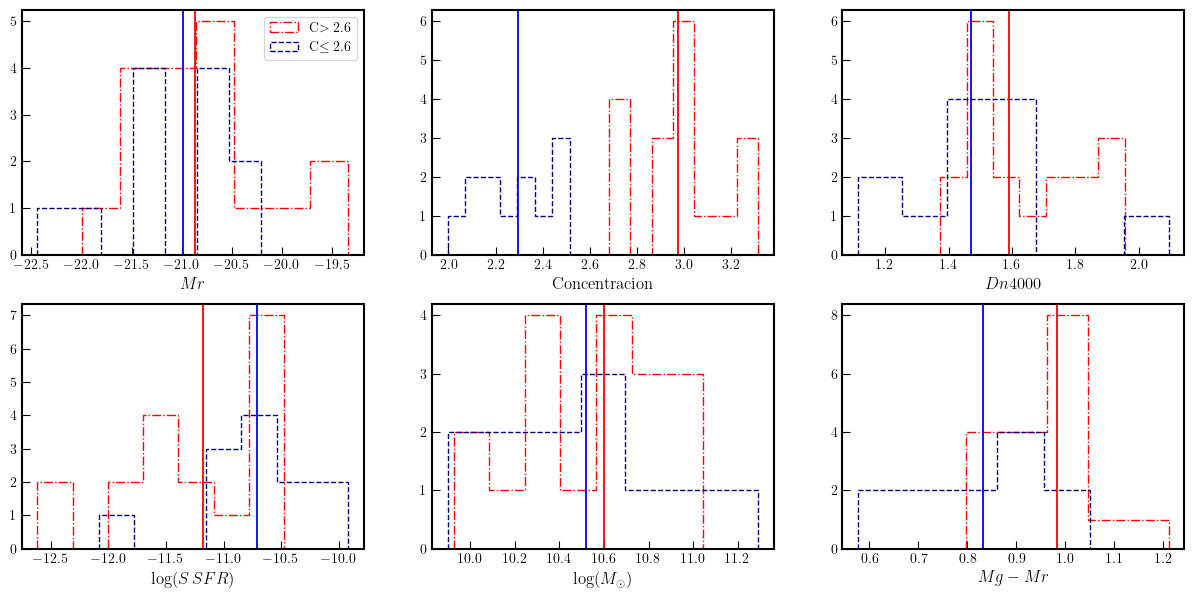

In [115]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,7))

h11 = ax1.hist(vds2_e['Mr'], bins=7, color='red', histtype='step', linestyle='-.',  label=r'C$> 2.6$')
h12 = ax1.hist(vds2_l['Mr'], bins=7, color='navy', histtype='step', linestyle='--', lw=1, label=r'C$\leq 2.6$')
#h12 = ax1.hist(vds2['Mr'], bins=25, ec='black', histtype='step', linestyle='--')
ax1.axvline(np.median(vds2_e['Mr']), color='red', linestyle='-', lw=1.3)
ax1.axvline(np.median(vds2_l['Mr']), color='blue', linestyle='-', lw=1.3)
ax1.set_xlabel(r'$Mr$', size=12)
ax1.legend()

h21 = ax2.hist(vds2_e['concind'], bins=7, color='red', histtype='step', linestyle='-.')
h22 = ax2.hist(vds2_l['concind'], bins=7, color='navy', histtype='step', linestyle='--',  lw=1)
ax2.axvline(np.median(vds2_e['concind']), color='red', linestyle='-', lw=1.3)
ax2.axvline(np.median(vds2_l['concind']), color='blue', linestyle='-', lw=1.3)
#h2 = ax2.hist(vds2['concind'], bins=15, ec='black', histtype='step', linestyle='--')
ax2.set_xlabel(r'$\mathrm{Concentracion}$', size=12)

h31 = ax3.hist(vds2_e['dn4000'], bins=7, color='red', histtype='step', linestyle='-.')
h32 = ax3.hist(vds2_l['dn4000'], bins=7, color='navy', histtype='step', linestyle='--', lw=1)
ax3.axvline(np.median(vds2_e['dn4000']), color='red', linestyle='-', lw=1.3)
ax3.axvline(np.median(vds2_l['dn4000']), color='blue', linestyle='-', lw=1.3)
#h3 = ax3.hist(vds2['dn4000'], bins=25, ec='black', histtype='step', linestyle='--')
ax3.set_xlabel(r'$Dn4000$', size=12)

h41 = ax4.hist(vds2_e['sfrmst'], bins=7, color='red', histtype='step', linestyle='-.')
h42 = ax4.hist(vds2_l['sfrmst'], bins=7, color='navy', histtype='step', linestyle='--', lw=1)
ax4.axvline(np.median(vds2_e['sfrmst']), color='red', linestyle='-', lw=1.3)
ax4.axvline(np.median(vds2_l['sfrmst']), color='blue', linestyle='-', lw=1.3)
#h4 = ax4.hist(vds2_l['sfr'], bins=25, color='navy', histtype='step', linestyle='--')
ax4.set_xlabel(r'$\log(S\,SFR)$', size=12)

h51 = ax5.hist(vds2_e['stmass'], bins=7, color='red', histtype='step', linestyle='-.')
h52 = ax5.hist(vds2_l['stmass'], bins=7, color='navy', histtype='step', linestyle='--', lw=1)
ax5.axvline(np.median(vds2_e['stmass']), color='red', linestyle='-', lw=1.3)
ax5.axvline(np.median(vds2_l['stmass']), color='blue', linestyle='-', lw=1.3)
#h5 = ax5.hist(vds2['stmass'], bins=25, ec='black', histtype='step', linestyle='--')
ax5.set_xlabel(r'$\log(M_{\odot})$', size=12)


h61 = ax6.hist(vds2_e['Mg']-vds2_e['Mr'], bins=5, color='red', histtype='step', linestyle='-.')
h62 = ax6.hist(vds2_l['Mg']-vds2_l['Mr'], bins=5, color='navy', histtype='step', linestyle='--', lw=1)
ax6.axvline(np.median(vds2_e['Mg']-vds2_e['Mr']), color='red', linestyle='-', lw=1.3)
ax6.axvline(np.median(vds2_l['Mg']-vds2_l['Mr']), color='blue', linestyle='-', lw=1.3)
#h6 = ax6.hist(vds2[stmass'], bins=25, ec='black', histtype='step', linestyle='--')
#ax6.set_xlim(0,2)
ax6.set_xlabel(r'$Mg-Mr$', size=12)


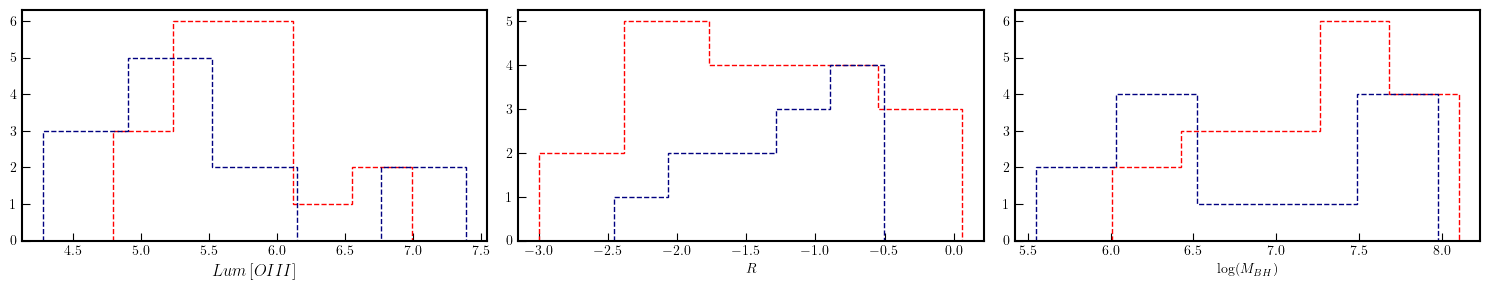

In [130]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))

h1 = ax1.hist(vds2_e['LumOIII'], bins=5, color='red', histtype='step', linestyle='--', label=r'C$> 2.6$')
h1 = ax1.hist(vds2_l['LumOIII'], bins=5, color='navy', histtype='step', linestyle='--', label=r'C$\leq 2.6$')
#h12 = ax1.hist(vds2['Mr'], bins=25, ec='black', histtype='step', linestyle='--')
ax1.set_xlabel(r'$Lum\,[OIII]$', size=12)

h2 = ax2.hist(vds2_e['R'], bins=5, color='red', histtype='step', linestyle='--', label=r'C$> 2.6$')
h2 = ax2.hist(vds2_l['R'], bins=5, color='navy', histtype='step', linestyle='--', label=r'C$\leq 2.6$')
ax2.set_xlabel(r'$R$')

h3 = ax3.hist(vds2_e['logMBH'], bins=5, color='red', histtype='step', linestyle='--', label=r'C$> 2.6$')
h3 = ax3.hist(vds2_l['logMBH'], bins=5, color='navy', histtype='step', linestyle='--', label=r'C$\leq 2.6$')
ax3.set_xlabel(r'$\log(M_{BH})$')
plt.tight_layout()

Text(0.5, 0, '$Mg-Mr$')

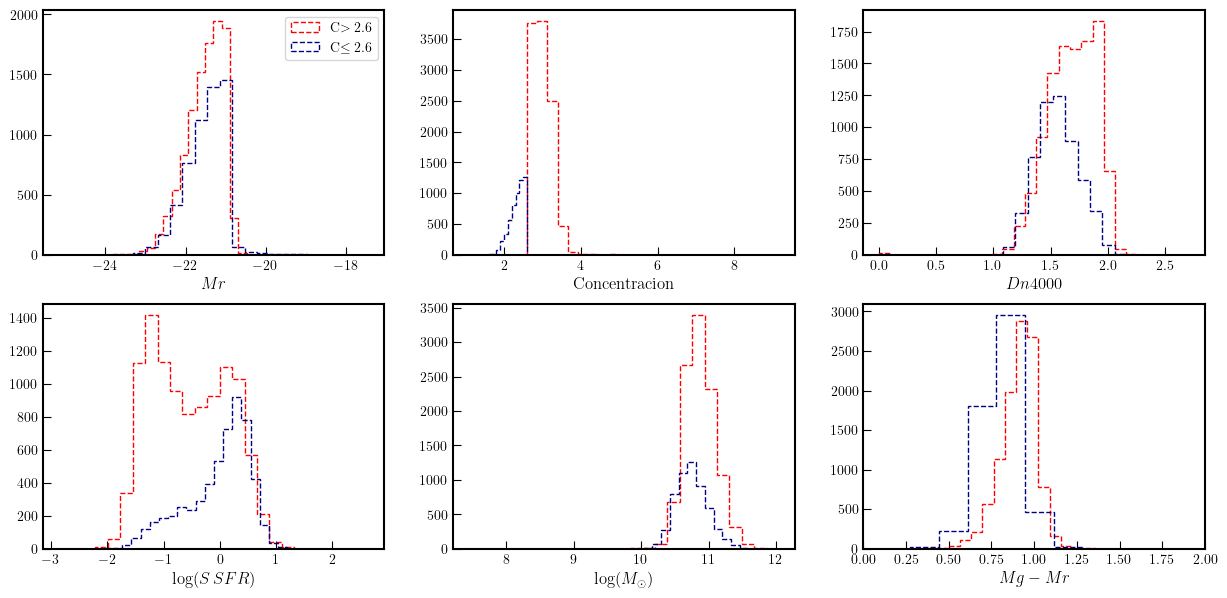

In [16]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,7))

h11 = ax1.hist(vds1_e['Mr'], bins=25, color='red', histtype='step', linestyle='--', label=r'C$> 2.6$')
h12 = ax1.hist(vds1_l['Mr'], bins=25, color='navy', histtype='step', linestyle='--', label=r'C$\leq 2.6$')
#h12 = ax1.hist(vds2['Mr'], bins=25, ec='black', histtype='step', linestyle='--')
ax1.set_xlabel(r'$Mr$', size=12)
ax1.legend()

h21 = ax2.hist(vds1_e['concind'], bins=25, color='red', histtype='step', linestyle='--')
h22 = ax2.hist(vds1_l['concind'], bins=15, color='navy', histtype='step', linestyle='--')
#h2 = ax2.hist(vds2['concind'], bins=15, ec='black', histtype='step', linestyle='--')
ax2.set_xlabel(r'$\mathrm{Concentracion}$', size=12)

h31 = ax3.hist(vds1_e['dn4000'], bins=25, color='red', histtype='step', linestyle='--')
h32 = ax3.hist(vds1_l['dn4000'], bins=25, color='navy', histtype='step', linestyle='--')
#h3 = ax3.hist(vds2['dn4000'], bins=25, ec='black', histtype='step', linestyle='--')
ax3.set_xlabel(r'$Dn4000$', size=12)

h41 = ax4.hist(vds1_e['sfr'], bins=25, color='red', histtype='step', linestyle='--')
h42 = ax4.hist(vds1_l['sfr'], bins=25, color='navy', histtype='step', linestyle='--')
#h4 = ax4.hist(vds2_l['sfr'], bins=25, color='navy', histtype='step', linestyle='--')
ax4.set_xlabel(r'$\log(S\,SFR)$', size=12)

h51 = ax5.hist(vds1_e['stmass'], bins=25, color='red', histtype='step', linestyle='--')
h52 = ax5.hist(vds1_l['stmass'], bins=25, color='navy', histtype='step', linestyle='--')
#h5 = ax5.hist(vds2['stmass'], bins=25, ec='black', histtype='step', linestyle='--')
ax5.set_xlabel(r'$\log(M_{\odot})$', size=12)


h61 = ax6.hist(vds1_e['Mg']-vds1_e['Mr'], bins=50, color='red', histtype='step', linestyle='--')
h62 = ax6.hist(vds1_l['Mg']-vds1_l['Mr'], bins=50, color='navy', histtype='step', linestyle='--')
#h6 = ax6.hist(vds2[stmass'], bins=25, ec='black', histtype='step', linestyle='--')
ax6.set_xlim(0,2)
ax6.set_xlabel(r'$Mg-Mr$', size=12)

In [133]:
vds2

PLATE,MJD,FIB,ra,dec,z,Mu,Mg,Mr,Mi,Mz,concind,stmass,sfrmst,sfr,dn4000,bpty,bptx,bptx2,bptx3,SN_Hbeta,SN_OIII,SN_OI,SN_Halpha,SN_NII,SN_SII6717,SN_SII6731,agn_type,LumOIII,logMBH,R,_RAJ2000,_DEJ2000,Survey,Name,RAB1950,DEB1950,cz,Den,Bmag,Rmag,_RA.icrs,_DE.icrs,Separation
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,,,,,km / s,,mag,mag,,,arcsec
int16,int32,int16,float64,float64,float32,float64,float64,float64,float64,float64,float32,float32,float64,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,bytes7,bytes12,bytes11,bytes11,int32,float32,float32,float32,bytes11,bytes11,float64
1380,53084,77,215.382974,38.118427,0.0223,-18.46622,-19.53079,-20.21299,-20.4726,-20.68978,2.32927,9.9559,-10.03764,-0.0307,1.4134,0.2464,-0.2234,-0.1179,-0.899,12.3279,16.3563,4.9646,32.0328,19.859,13.7156,10.9326,100,5.294511351891554,6.500987434390989,-1.2064760824994352,215.3833065,38.1179674,CfA2,14194+3820,14 19 28.51,+38 20 44.2,6801,0.7,15.4,14.43,14 21 31.99,+38 07 04.7,1.9037903706951806
1406,52876,359,241.667426,30.099069,0.0219,-19.08631,-20.78459,-21.99531,-22.62681,-23.02129,2.68044,11.0441,-11.39964,-0.2988,1.7033,-0.0218,-0.1509,-0.21,-0.9861,12.0086,9.8924,5.9874,40.1327,29.8768,14.6757,12.5956,100,5.976335785788247,7.796423378035088,-1.820087592246841,241.6678679,30.0985414,CfA2,16046+3014,16 04 40.61,+30 13 54.1,6732,0.58,14.19,12.8,16 06 40.29,+30 05 54.7,2.345605258102237
2143,54184,73,223.631763,24.027267,0.02141,-18.36416,-19.78849,-20.62424,-21.01113,-21.28733,3.02901,10.3702,-10.58422,-0.1648,1.481,0.2163,-0.135,-0.2202,-1.156,14.7195,17.8365,3.4493,37.8858,27.4557,14.6616,10.8324,100,5.649792853989898,6.678320841330953,-1.0285279873410547,223.6318199,24.0273006,CfA2,14523+2413,14 52 18.41,+24 13 46.9,6492,0.83,15.36,13.96,14 54 31.64,+24 01 38.3,0.2227876733430262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,54212,510,227.121002,21.947721,0.02064,-18.22196,-19.92422,-20.92369,-21.37875,-21.64156,3.16416,10.6376,-12.44494,-1.7593,1.9551,0.2628,0.0543,-0.2173,-0.7099,7.8860001,12.8751,2.8675,12.986,14.7486,5.4653,3.2383,300,4.985807214489046,7.983470848790962,-2.997663634301915,227.1209957,21.9477147,CfA2,15062+2208,15 06 15.00,+22 08 17.2,6259,0.99,15.24,13.59,15 08 29.04,+21 56 51.8,0.030933916826754903
421,51821,428,14.917157,15.331002,0.01829,-18.46052,-20.04024,-20.98875,-21.41583,-21.64094,3.31513,10.565,-11.79607,-1.1669,1.731,0.9455,0.2859,-0.0398,-0.5831,25.294,99.1433,20.6043,57.5046,94.4251,31.6645,33.845,400,6.995378468598401,7.435509345880664,-0.44013087728226363,14.9172066,15.3309132,CfA2,00570+1504,00 57 01.80,+15 03 41.4,5705,1.1,14.86,13.38,00 59 40.13,+15 19 51.3,0.36311178827814294
748,52233,520,356.765789,14.841769,0.02209,-18.35477,-19.85499,-20.65298,-21.06957,-21.28229,2.95583,10.3915,-10.75046,-0.3059,1.5334,0.5948,0.0411,-0.1867,-0.8655,7.655,19.2801,3.3006,20.5912,21.0186,7.7089,5.7403,400,5.923296181228089,6.812701832985113,-0.8894056517570235,356.7655819,14.8416599,CfA2,23445+1434,23 44 31.06,+14 33 49.7,6842,1.13,15.04,13.7,23 47 03.74,+14 50 30.0,0.820761063455773


Text(0, 0.5, '$\\log(SSFR)$')

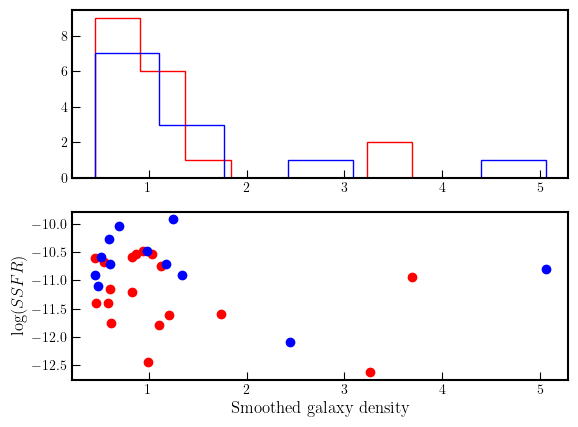

In [147]:
fig, (ax1,ax2) = plt.subplots(2,1)

ax1.hist(vds2_e['Den'], bins=7, color='red', histtype='step')
ax1.hist(vds2_l['Den'], bins=7, color='blue', histtype='step')

ax2.scatter(vds2_e['Den'], vds2_e['sfrmst'], c='red')
ax2.scatter(vds2_l['Den'], vds2_l['sfrmst'], c='blue')
ax2.set_xlabel(r'Smoothed galaxy density', size=12)
ax2.set_ylabel(r'$\log(SSFR)$',size=12)